Classifier testing with mnist clothing data
-----

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

C:\Users\Joey\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


In [2]:
fashion_mnist=keras.datasets.fashion_mnist

# train_images and train labels are the training set, data model uses to learn
# test_images and test_labels are what we test the model against
# these are arrays
(train_images,train_labels), (test_images,test_labels)=fashion_mnist.load_data()

#### images downloaded are 28x28 (pixel (0-255)) NumPy arrays

#### labels are arrays of integers (0-9), corresponding ot classes of clothing:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [3]:
# saving class names for later use
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Exploring the data
-----

In [4]:
# 60000 images 28x28 pixels
train_images.shape

(60000, 28, 28)

In [5]:
# 60000 labels for each image in train_images
len(train_labels)

60000

In [6]:
# each label is an integer (0-9)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
# 10000 images (28x28 pixels) in test set
test_images.shape

(10000, 28, 28)

In [8]:
# 10000 labels in test_labels
len(test_labels)

10000

#### need to preprocess data for network training 
#### currently pixel values are 0-255
#### we want to scale these values to a range of 0-1 for the model training

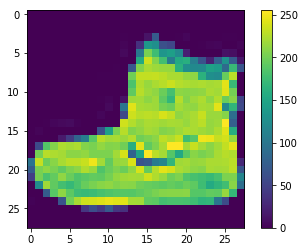

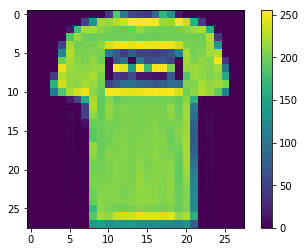

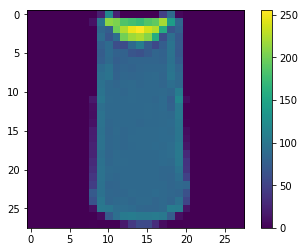

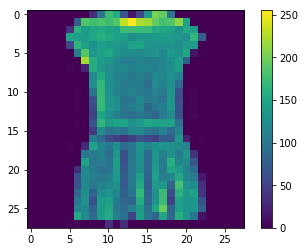

In [9]:
for i in range(4):
    plt.figure()
    plt.imshow(train_images[i]) 
    plt.colorbar()

In [10]:
# going from int to float by float division
train_images=train_images/255.0
test_images=test_images/255.0

In [11]:
# find first nonzero-row of first image in train_images 
# and check it has been scaled correctly
for i in range(28):
    if sum(train_images[0][i])>0.0:
        print('This is row '+str(i)+'.')
        print(train_images[0][i])
        break

This is row 3.
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627451 0.
 0.         0.00392157 0.01568627 0.         0.         0.
 0.         0.00392157 0.00392157 0.        ]


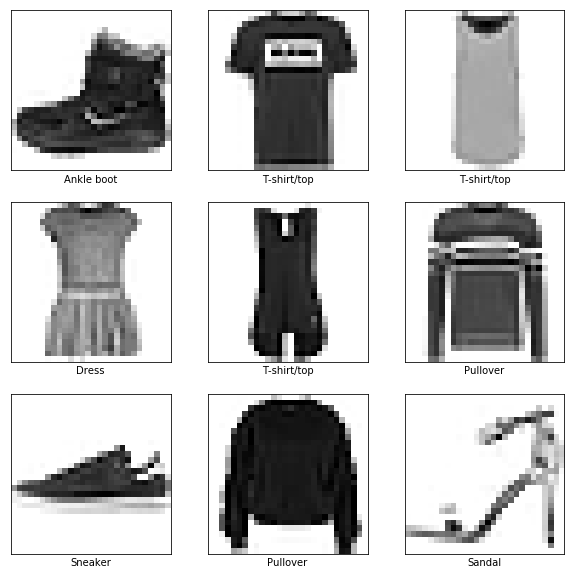

In [12]:
# checking out the data after scaling
# check that data looks good for training the network
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

#### training data looks good

Building the Model
------

#### to build model we need to : configure layers of the model, compile model

#### setting up the layers

In [13]:
# keras.layers.Dense have parameters that are learned during training
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

keras.layers.Flatten(input_shape=(28,28))
transforms the format of the images from 28x28 pixels 2d-array
to a 1d-arary of 28*28=728 pixels

after pixels are flattened:
the network consists of a sequence of two tf.keras.layers.Dense layers

these are densely(or fully)-connected neural layers 

the first layer has 128 nodes

the second layer is a 10-node softmax layer
    - this returns an array of 10 probability scores that sum to 1 (for classifiying images into 1 of 10 classes)

Compiling the Model
-----

#### We need to prepare model for traing, it needs a few more settings. These are added during the model's compile step:
    - Loss function: Measures how accurate the model is during training. We want to minimze this function to 'steer' the model in the right direction
    - Optimizer: This is how the model is updated based on the data it sees and its loss function
    - Metrics: Used to monitor the trainign and testing steps

In [14]:
# the following example uses 'accuracy' as a metric. Accuracy is deteremined by 
# the fraction of images that are correctly classified

In [15]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the Model
-----

#### Training the nn model requires the following:
    - Feed the data in (train_images & train_labels)
    - The model learns to associate images and labels
    - We ask the model to make predictions about a test set, the test_images array in this example. We verify the predictions match the labels from the test_labels array

In [16]:
# call the model.fit method to 'fit' the model to the training data
model.fit(train_images, train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 171us/step - loss: 0.4998 - acc: 0.8228
Epoch 2/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.3732 - acc: 0.8636
Epoch 3/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.3364 - acc: 0.8763
Epoch 4/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.3147 - acc: 0.8841
Epoch 5/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.2953 - acc: 0.8910


loss and accuracy metrics displayed

Model reaches accuracy of ~0.88

Evaluate Accuracy
-----

throw test_data/labels array through model and see how it does 

In [17]:
test_loss, test_acc=model.evaluate(test_images,test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 109us/step
Test accuracy: 0.8673


here we see that the model is a little less accurate when tried with the test data than with the the training data

this is an example of overfitting, when the model performs worse on new data than on the model's training data

Using the model to make predictions
-----

In [18]:
predictions=model.predict(test_images)

In [19]:
# here we have the predictions for each of the test_images
# predictions are a set of 10 numbers corresponding to probabilities of image 
# being in class
predictions[0]

array([1.6268850e-06, 4.4159192e-09, 5.8987059e-08, 1.5235182e-09,
       9.7554607e-07, 2.2442858e-03, 6.0813647e-07, 1.1722737e-02,
       1.2378985e-05, 9.8601741e-01], dtype=float32)

In [20]:
# show largest confidence-of-class by model for first test image
np.argmax(predictions[0])

9

In [21]:
# this is equal to the given label
test_labels[0]

9

In [22]:
# it is a boot
class_names[9]

'Ankle boot'

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [24]:
def show_image_predictions(i):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(1,2,2)
    plot_value_array(i,predictions,test_labels)

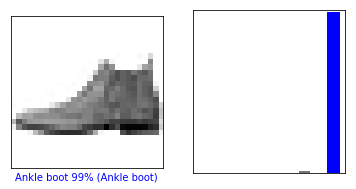

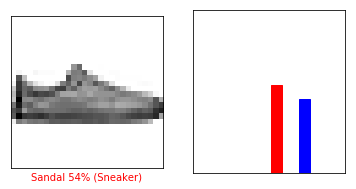

In [25]:
# let's check out the 0th and 12th test image, predictions and predictions array
show_image_predictions(0)
show_image_predictions(12)

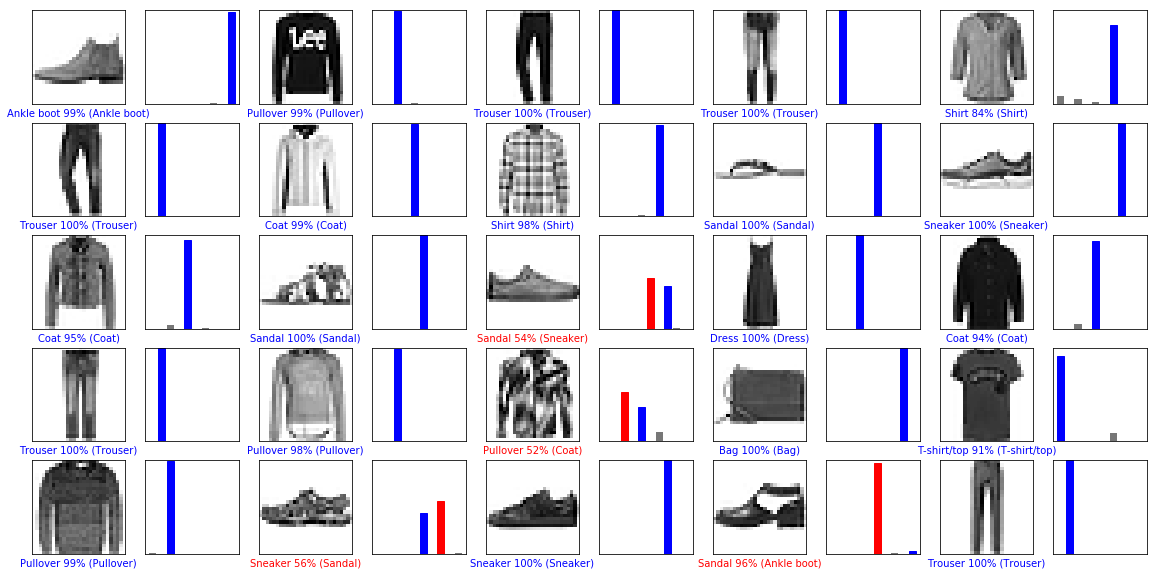

In [26]:
# plotting more images with their predictions
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

Using trained model to make a prediction about a single image
-----

In [27]:
img=test_images[0]
print(img.shape)

(28, 28)


In [28]:
# tf.keras models are optimized to make predictions on a batch of images at once
# so we will make our image a small batch
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [29]:
# now predict the image
predictions_single=model.predict(img)
print(predictions_single)

[[1.6268805e-06 4.4159028e-09 5.8986721e-08 1.5235095e-09 9.7554232e-07
  2.2442816e-03 6.0813591e-07 1.1722704e-02 1.2378926e-05 9.8601741e-01]]


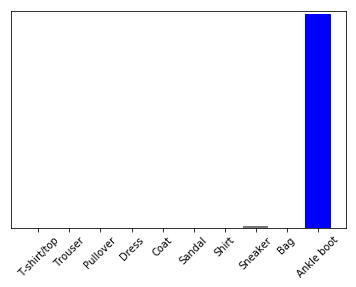

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

9

In [32]:
# it is a boot

In [33]:
# where is the first bag
bagIndex=0
for i in range(len(test_images)):
    if class_names[test_labels[i]]=='Bag': 
        bagIndex=i
        break

In [34]:
bagIndex

18

testing model with an image of a hoodie I found online
-------

In [35]:
from PIL import Image
foo=Image.open("mcdonalds-black-hoodie.jpeg")
print(foo.size)

(600, 600)


In [36]:
# need to downsize to (28,28)?
# downsize using ANTIALIAS filter (supposedly gives the highest quality)
foo=foo.resize((28,28),Image.ANTIALIAS)
foo.save("mickeyDsFormatted.jpg",quality=95)

In [37]:
# don't think this will do anything, but trying nonetheless
# optimizes file size and image quality
foo.save("mickeyDsOpt.png",optimize=True,quality=95)

In [38]:
# create small batch with the mcdonalds image
foo=(np.expand_dims(foo,0))
print(foo.shape)

(1, 28, 28, 3)


In [39]:
foo[0][0]
# need grayscale values

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [253, 253, 253],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [254, 254, 254],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

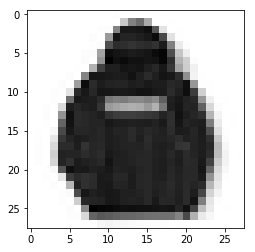

In [40]:
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('mickeyDsOpt.png')     
gray = rgb2gray(img)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [41]:
print(gray.shape)

(28, 28)


In [42]:
print(gray[3])
# looks good enough

[1.         1.         1.         1.         1.         1.
 1.         1.         0.98823529 1.         0.60626669 0.07964706
 0.14631373 0.14631373 0.12973334 0.10390196 0.04738039 0.29096472
 0.88582746 0.99607843 1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [43]:
gray=(np.expand_dims(gray,0))
print(gray.shape)

(1, 28, 28)


In [44]:
# copied from above

# now predict the image
predictions_single=model.predict(gray)
print(predictions_single)

[[9.1992929e-09 4.0453987e-09 1.1042579e-09 1.9239879e-14 1.0774278e-16
  1.3293152e-15 1.7093575e-07 4.5132658e-18 9.9999976e-01 3.6434670e-12]]


8

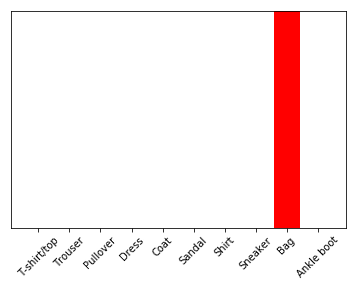

In [45]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])

In [46]:
# it thinks it is a bag lol

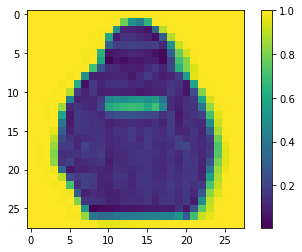

In [47]:
plt.figure()
plt.imshow(gray[0]) 
plt.colorbar()

In [48]:
# colors look reversed
# let's try inverting the colors
gray1=[]
for i in range(len(gray[0])):
    gray1.append([1-x for x in gray[0][i]])

In [49]:
print(gray1[0])

[1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 0.00784313678741455, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 0.003921568393707275, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16, 1.1102230246251565e-16]


In [50]:
print(len(gray1))
print(len(gray1[0]))
print(gray1[0][0])

28
28
1.1102230246251565e-16


In [51]:
# make small values = 0
import sys
for i in range(28):
    for j in range(28): 
        if (gray1[i][j] < sys.float_info.epsilon): gray1[i][j]=0

In [52]:
print(gray1[0])
# looks like we got those ugly values to be 0

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00784313678741455, 0, 0, 0, 0, 0, 0.003921568393707275, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [53]:
# resize our gray1 object
gray1=(np.expand_dims(gray1,0))
print(gray1.shape)

(1, 28, 28)


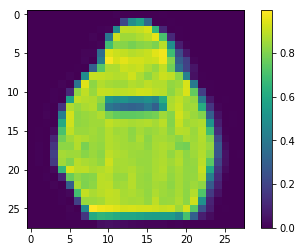

In [54]:
# finally have grey1 formatted how we want, let's plot it
plt.figure()
plt.imshow(gray1[0]) 
plt.colorbar()

[[8.9781417e-05 8.2353887e-07 1.9052888e-03 1.1177076e-05 9.9544793e-01
  3.0390826e-10 1.6181059e-03 3.6730141e-10 9.2678273e-04 2.7926179e-11]]


4

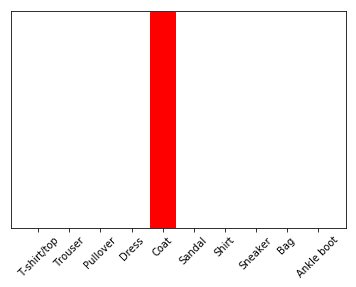

In [55]:
# this is formatted as the test and training data is
# now let's try to put it through the model
predictions_single=model.predict(gray1)
print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])

In [56]:
# it thinks it is a coat, awesome!

Cleaning up Process and Testing With a Crock
-----

In [57]:
# from PIL import Image
# import matplotlib.image as mpimg
# import sys
import os

# this function will take a local image filename and format it for testing with the model
# it will be passable into the checkSingle function below
# it will also print the greyscale conversion of the reduced image
def importImage(file):
    filename,file_extension=os.path.splitext(file)
    foo=Image.open(file)
    # need to downsize to (28,28)
    # downsize using ANTIALIAS filter (supposedly gives the highest quality)
    foo=foo.resize((28,28),Image.ANTIALIAS)
    # optimizes file size and image quality, saving reduced image
    fooReduName=str(filename+"_reduced.png")
    foo.save(fooReduName,optimize=True,quality=95)
    
    # already defined rgb above but keep it here just in case
    #def rgb2gray(rgb):
    #    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    img = mpimg.imread(fooReduName)     
    gray = rgb2gray(img)    
    # could remove next 2 lines below (for plotting)
    plt.imshow(gray, cmap = plt.get_cmap('gray'))
    plt.show()
    
    # now inverse colors
    gray1=[]
    for i in range(len(gray)):
        gray1.append([1-x for x in gray[i]])
    # make small values = 0
    for i in range(28):
        for j in range(28): 
            if (gray1[i][j] < sys.float_info.epsilon): gray1[i][j]=0
    
    # resizing grey1 object to small batch
    gray1=(np.expand_dims(gray1,0))
    
    # plot formmatted obj
    plt.figure()
    plt.imshow(gray1[0]) 
    plt.colorbar()
    
    return gray1

In [58]:
def checkSingle(name):
    predictions_single=model.predict(name)
    print(predictions_single)
    plot_value_array(0, predictions_single, test_labels)
    _ = plt.xticks(range(10), class_names, rotation=45)
    np.argmax(predictions_single[0])

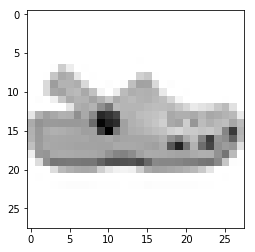

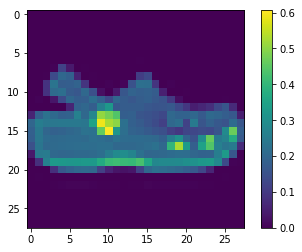

In [59]:
check=importImage('croc.jpeg')

[[4.5965379e-03 4.2897140e-04 2.1402361e-03 1.3498210e-03 1.7782839e-02
  1.8698913e-01 1.4192541e-03 6.2274307e-01 1.6201888e-01 5.3128140e-04]]


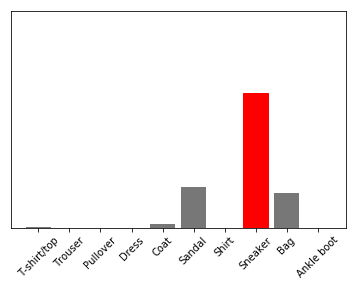

In [60]:
checkSingle(check)

#### looks like a croc is a bit of sneaker, sandal and bag

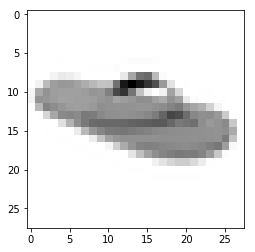

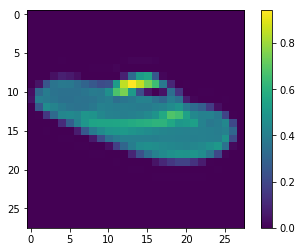

In [63]:
check=importImage('flip flop.jpg')

[[0.01030344 0.00313928 0.00281183 0.00426998 0.00203593 0.01005798
  0.0037711  0.80482197 0.15708575 0.00170269]]


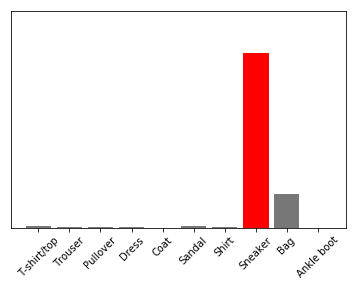

In [64]:
checkSingle(check)

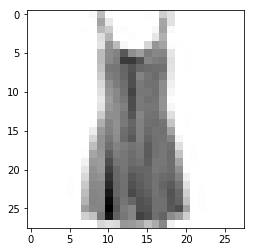

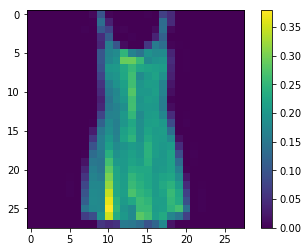

In [65]:
check=importImage('sundress.jpg')

[[7.02410042e-02 3.30963507e-02 2.18909420e-02 7.57425249e-01
  1.21439425e-02 1.39746871e-02 6.20672926e-02 4.81144874e-04
  2.60862391e-02 2.59317691e-03]]


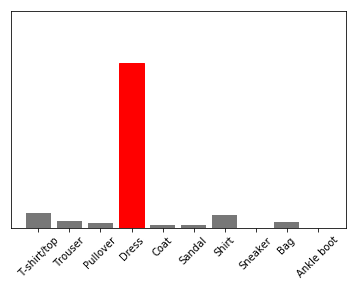

In [66]:
checkSingle(check)

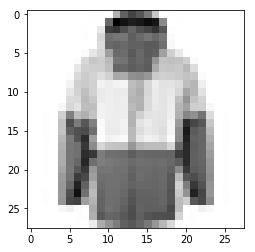

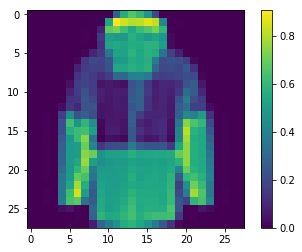

In [67]:
check=importImage('burton.jpg')

[[6.0445695e-06 5.3116045e-09 3.1965680e-03 1.1134027e-05 9.9115443e-01
  8.4830800e-09 5.5796453e-03 2.6928773e-10 5.2243264e-05 5.1460777e-11]]


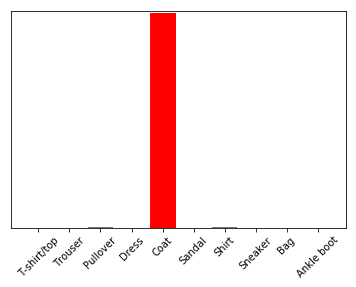

In [68]:
checkSingle(check)